# EDA preparatorio para el proceso ETL

### Paso 0: Importar las librerias necesarias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yellow_sample = pd.read_parquet('../assets/Datasets/yellow_tripdata_2024-09.parquet')
green_sample = pd.read_parquet('../assets/Datasets/green_tripdata_2024-09.parquet')
for_hire_sample = pd.read_parquet('../fhv_tripdata_2024-09.parquet')
hv_sample = pd.read_parquet('../fhvhv_tripdata_2024-09.parquet')

### A continuación tenemos informacion de las columnas de cada dataset y el tipo de dato.

### Taxis Amarillos

In [3]:
yellow_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633030 entries, 0 to 3633029
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### Taxis Verdes

In [4]:
green_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54440 entries, 0 to 54439
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54440 non-null  int32         
 1   lpep_pickup_datetime   54440 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54440 non-null  datetime64[us]
 3   store_and_fwd_flag     52736 non-null  object        
 4   RatecodeID             52736 non-null  float64       
 5   PULocationID           54440 non-null  int32         
 6   DOLocationID           54440 non-null  int32         
 7   passenger_count        52736 non-null  float64       
 8   trip_distance          54440 non-null  float64       
 9   fare_amount            54440 non-null  float64       
 10  extra                  54440 non-null  float64       
 11  mta_tax                54440 non-null  float64       
 12  tip_amount             54440 non-null  float64       
 13  t

### Taxis For-Hire

In [5]:
for_hire_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718375 entries, 0 to 1718374
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[us]
 2   dropOff_datetime        datetime64[us]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   SR_Flag                 float64       
 6   Affiliated_base_number  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 91.8+ MB


### Taxis High-Volume For-Hire (empresas tipo Uber)

In [6]:
hv_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209788 entries, 0 to 19209787
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

### De la información anterior, las principales columnas necesarias de acuerdo a los objetivos y producto ML son:

| Amarillos          | Verdes |  For-hire | High-volume |  Tipo de dato  | Detalle
| ------             |    -----  | -----  |    -----  | -----  |  ---- |   
| --             |    --  | --  | request_datetime  | datetime64[us] | --
| --             |    --  | -- | on_scene_datetime  | datetime64[us] | --
| tpep_pickup_datetime  |lpep_pickup_datetime | pickup_datetime | pickup_datetime | datetime64[us] | Se deben normalizar los nombres de las columnas antes de concatenar
| tpep_dropoff_datetime | lpep_dropoff_datetime | dropOff_datetime | dropoff_datetime |datetime64[us]| Se deben normalizar los nombres de las columnas antes de concatenar
| trip_distance    |trip_distance      | -- | trip_miles | float64 | Se deben normalizar los nombres de las columnas antes de concatenar  
| --            |    --  | --  |trip_time     |        int64   | --          
| PULocationID   | PULocationID        |PUlocationID (float64) | PULocationID   |  int32 | Se deben cambiar el tipo de dato en "For-Hire" de `float` a `int32`, para que todos sean el mismo tipo
| DOLocationID| DOLocationID         |  DOlocationID (float64) | DOLocationID | int32 | Se deben cambiar el tipo de dato en "For-Hire" de `float` a `int32`, para que todos sean el mismo tipo



### Columnas opcionales que se pueden conservar para algun tipo de extra o plus.

| Columna          | Dataset |     tipo de dato      
| ------             |    -----  | ----- 
| fare_amount | * amarillos <br> * verdes      | float64 
| total_amount|* amarillos <br> * verdes       | float64
| extra| * amarillos <br> * verdes  | float64       
| mta_tax| * amarillos <br> * verdes  | float64       
| tip_amount  | * amarillos <br> * verdes  | float64       
| tolls_amount | * amarillos <br> * verdes  | float64       
| improvement_surcharge| * amarillos <br> * verdes  | float64              
| congestion_surcharge| * amarillos <br> * verdes <br> * High-volume | float64       
| Airport_fee           | * amarillos <br> * High-volume |float64
| ehail_fee         | * verdes|      float64
| base_passenger_fare | * High-volume | float64       
| tolls | * High-volume |  float64       
| bcf | * High-volume | float64       
| sales_tax| * High-volume |float64                  
| tips| * High-volume |float64       
| driver_pay| * High-volume |float64

### Columnas que, por el momento, no aportan información relevante relacionada con el proyecto


| Columna          | Dataset |     Tipo de dato      
| ------             |    -----  | ----- 
| VendorID   | * amarillos <br> * verdes  |            int32      
|  passenger_count | * amarillos <br> * verdes  |       float64       
|  RatecodeID   | * amarillos <br> * verdes  |          float64       
| store_and_fwd_flag| * amarillos <br> * verdes  |     object          
| payment_type  | * amarillos <br> * verdes  |         int64                  
| trip_type     | * verdes|           float64 
| dispatching_base_num | * For-hire |   object              
| SR_Flag   | * For-hire | float64       
| Affiliated_base_number | * For-hire |  object 
| hvfhs_license_num  | * High-Volume |   object        
| dispatching_base_num  | * High-Volume |object        
|  originating_base_num  | * High-Volume |object        
| shared_request_flag   | * High-Volume |object        
| shared_match_flag     | * High-Volume |object        
| access_a_ride_flag    | * High-Volume |object        
| wav_request_flag      | * High-Volume |object        
| wav_match_flag        | * High-Volume |object 

In [7]:
yellow_sample = yellow_sample[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                               'trip_distance',
                               'PULocationID', 'DOLocationID']]

green_sample = green_sample[['lpep_pickup_datetime', 'lpep_dropoff_datetime',
                             'PULocationID', 'DOLocationID',
                             'trip_distance']]

for_hire_sample = for_hire_sample[['pickup_datetime', 'dropOff_datetime',
                                   'PUlocationID', 'DOlocationID']]

hv_sample = hv_sample[['request_datetime', 'on_scene_datetime', 'pickup_datetime',
                       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
                       'trip_time']]

print(yellow_sample.shape)
print(green_sample.shape)
print(for_hire_sample.shape)
print(hv_sample.shape)

(3633030, 5)
(54440, 5)
(1718375, 4)
(19209788, 8)


## Para el filtrado de datos, se sugiere seguir los siguientes criterios:

* Eliminar las filas donde `pick_up_datetime` y `pick_up_location` sean nulos.

In [8]:
yellow_filtrado = yellow_sample[(yellow_sample['tpep_pickup_datetime'].notnull())&(yellow_sample['PULocationID'].notnull())].copy()
green_filtrado = green_sample[(green_sample['lpep_pickup_datetime'].notnull())&(green_sample['PULocationID'].notnull())].copy()
for_hire_filtrado = for_hire_sample[(for_hire_sample['pickup_datetime'].notnull())&(for_hire_sample['PUlocationID'].notnull())].copy()
hv_filtrado = hv_sample[(hv_sample['pickup_datetime'].notnull())&(hv_sample['PULocationID'].notnull())].copy()

print(yellow_filtrado.shape)
print(green_filtrado.shape)
print(for_hire_filtrado.shape)
print(hv_filtrado.shape)

(3633030, 5)
(54440, 5)
(399103, 4)
(19209788, 8)


* Calcular tiempo de viaje (`drop_off_datetime` - `pick_up_datetime`).
* Eliminar tiempos y distancias 0 y negativas.


**NOTA: para el dataset de `For-Hire` no hay informacion de la distancia, por lo que se debe tomar una decision sobre como filtrar este dataset, si no aplicar ese criterio, o descartar el dataset entero.**

In [9]:
yellow_filtrado['trip_time'] = yellow_filtrado['tpep_dropoff_datetime']-yellow_filtrado['tpep_pickup_datetime']
green_filtrado['trip_time'] = green_filtrado['lpep_dropoff_datetime']-green_filtrado['lpep_pickup_datetime']
for_hire_filtrado['trip_time']=for_hire_filtrado['dropOff_datetime']-for_hire_filtrado['pickup_datetime']
# high-volume ya tiene una columna de tiempo de viaje

In [10]:
yellow_filtrado = yellow_filtrado[(yellow_filtrado['trip_time']>pd.Timedelta(0))&(yellow_filtrado['trip_distance']>0)]
green_filtrado = green_filtrado[(green_filtrado['trip_time']>pd.Timedelta(0))&(green_filtrado['trip_distance']>0)]
for_hire_filtrado = for_hire_filtrado[(for_hire_filtrado['trip_time']>pd.Timedelta(0))] # aqui no hay trip_distace, por lo que por los momentos solo filtramos por tiempo
hv_filtrado = hv_filtrado[(hv_filtrado['trip_time']>0)&(hv_filtrado['trip_miles']>0)]

print(yellow_filtrado.shape)
print(green_filtrado.shape)
print(for_hire_filtrado.shape)
print(hv_filtrado.shape)

(3551821, 6)
(51650, 6)
(399103, 5)
(19206797, 8)


* Con tiempos y distancias positivas crear una nueva columna calculando velocidad promedio.
* Mantener filas cuyas velocidades sean razonables (Valor a establecer, en este EDA se usara 65 mph que es la maxima velocidad permitida en NYC).

In [11]:
yellow_filtrado['avg_speed'] = yellow_filtrado['trip_distance']/(yellow_filtrado['trip_time']/pd.Timedelta(hours=1))
green_filtrado['avg_speed'] = green_filtrado['trip_distance']/(green_filtrado['trip_time']/pd.Timedelta(hours=1))
for_hire_filtrado['avg_speed']= 0.0 #for_hire_filtrado['trip_distance']/(for_hire_filtrado['trip_time']/pd.Timedelta(hours=1))
hv_filtrado['avg_speed']=hv_filtrado['trip_miles']/(hv_filtrado['trip_time']/3600) # la info ya viene como int en segundos, se convierte a horas

print(yellow_filtrado['avg_speed'].dtype)
print(green_filtrado['avg_speed'].dtype)
print(for_hire_filtrado['avg_speed'].dtype)
print(hv_filtrado['avg_speed'].dtype)

float64
float64
float64
float64


In [12]:
yellow_filtrado = yellow_filtrado[(yellow_filtrado['avg_speed']>=0)&(yellow_filtrado['avg_speed']<=65)]
green_filtrado = green_filtrado[(green_filtrado['avg_speed']>=0)&(green_filtrado['avg_speed']<=65)]
for_hire_filtrado = for_hire_filtrado[(for_hire_filtrado['avg_speed']>=0)&(for_hire_filtrado['avg_speed']<=65)]
hv_filtrado = hv_filtrado[(hv_filtrado['avg_speed']>=0)&(hv_filtrado['avg_speed']<=65)]

print(yellow_filtrado.shape)
print(green_filtrado.shape)
print(for_hire_filtrado.shape)
print(hv_filtrado.shape)

(3550475, 7)
(51430, 7)
(399103, 6)
(19206721, 9)


In [13]:
for_hire_filtrado[for_hire_filtrado['avg_speed']!=0].shape

# TODOS los for-hire tienen avg_speed = 0

(0, 6)

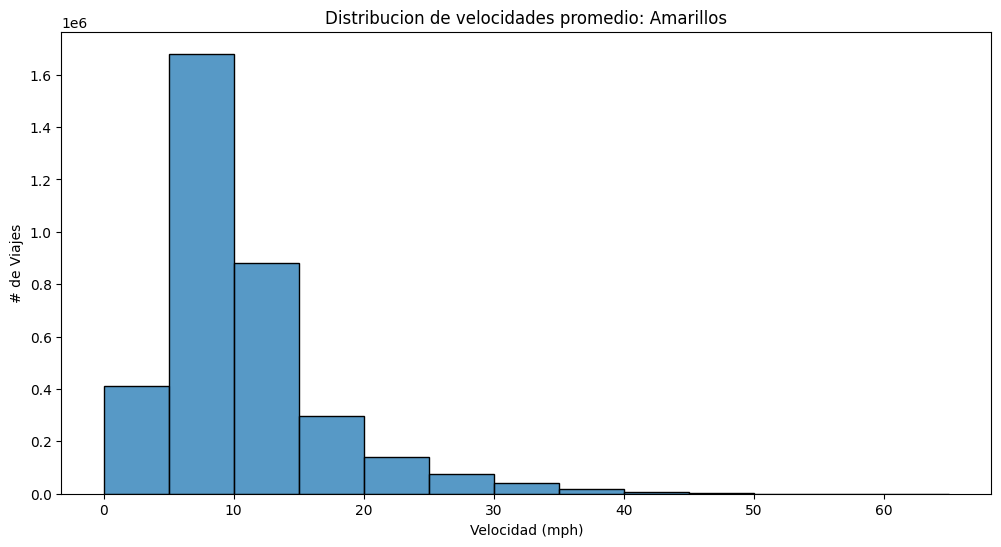

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
sns.histplot(data=yellow_filtrado['avg_speed'], binwidth=5)
plt.title('Distribucion de velocidades promedio: Amarillos') 
plt.xlabel('Velocidad (mph)')
plt.ylabel('# de Viajes')
plt.show()

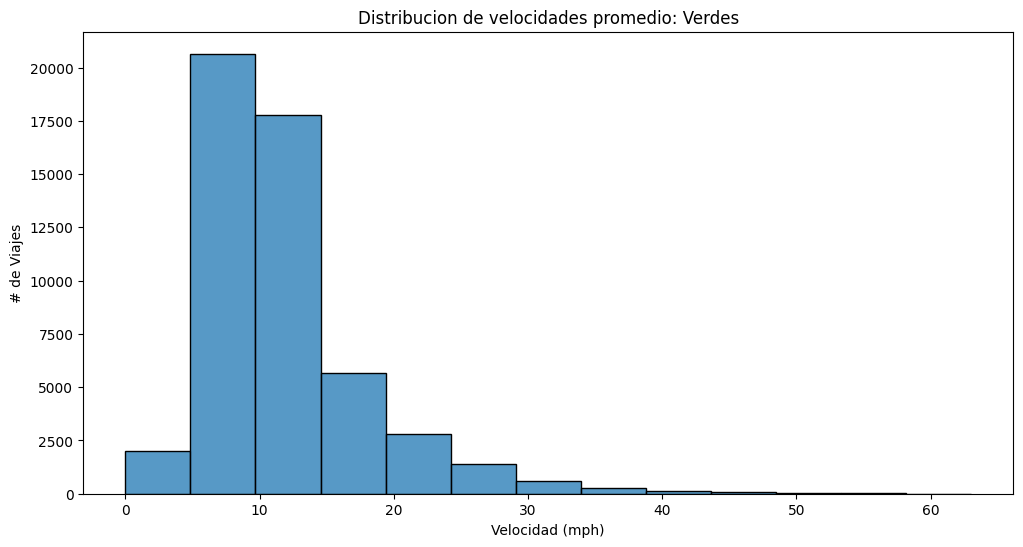

In [15]:
sns.histplot(data=green_filtrado['avg_speed'], binwidth=5)
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Distribucion de velocidades promedio: Verdes') 
plt.xlabel('Velocidad (mph)')
plt.ylabel('# de Viajes')
plt.show()

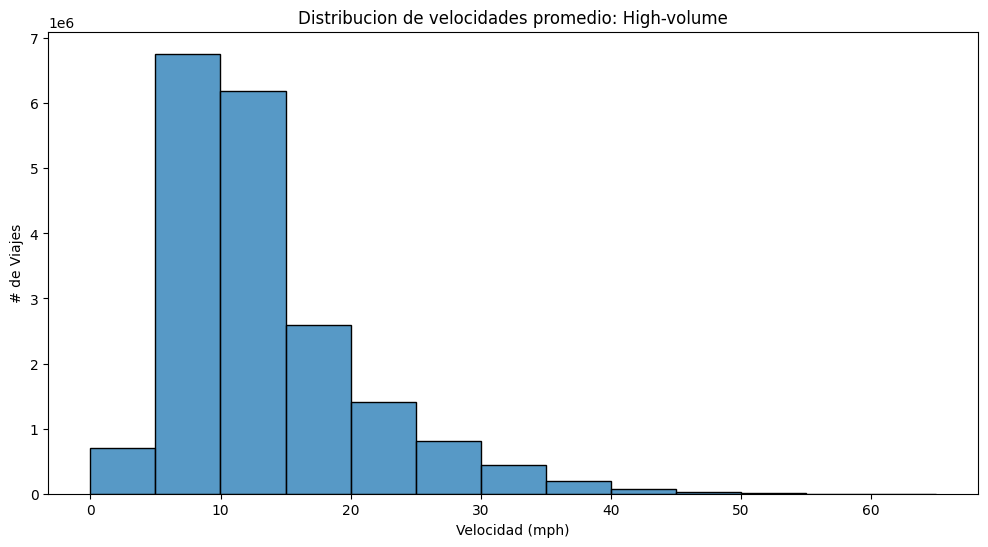

In [16]:
sns.histplot(data=hv_filtrado['avg_speed'], binwidth=5)
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Distribucion de velocidades promedio: High-volume') 
plt.xlabel('Velocidad (mph)')
plt.ylabel('# de Viajes')
plt.show()

### Luego de normalizar los nombres de las columnas mas importantes, y cambiar el tipo de dato donde es requerido como se menciona en la tabla anterior en la columna de `Detalle`, se pueden concatenar los 4 dataset para generar uno solo con toda la información relevante.

### Ahora se muestra el porcentaje de la data que queda luego de los filtros sugeridos

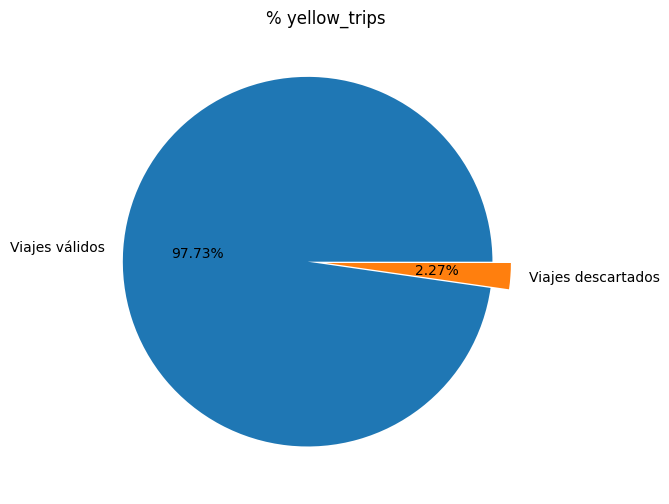

In [17]:
data = [yellow_filtrado.shape[0], (yellow_sample.shape[0]-yellow_filtrado.shape[0])]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('% yellow_trips') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

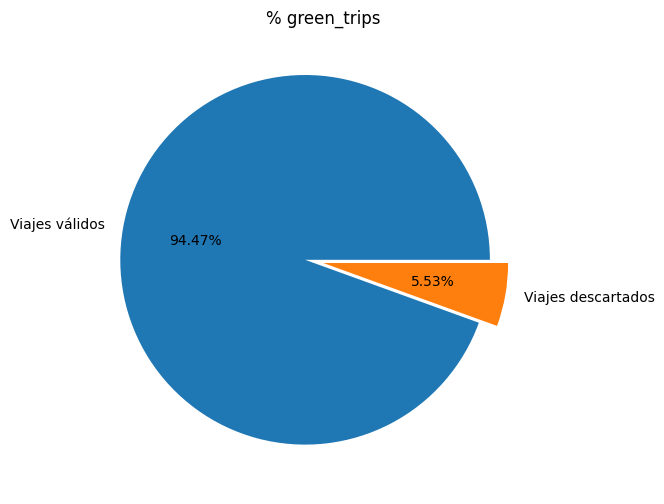

In [18]:
data = [green_filtrado.shape[0], (green_sample.shape[0]-green_filtrado.shape[0])]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('% green_trips') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

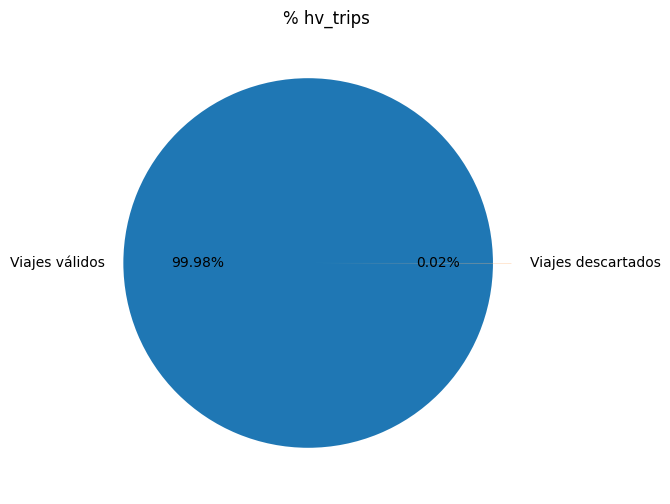

In [19]:
data = [hv_filtrado.shape[0], (hv_sample.shape[0]-hv_filtrado.shape[0])]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('% hv_trips') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

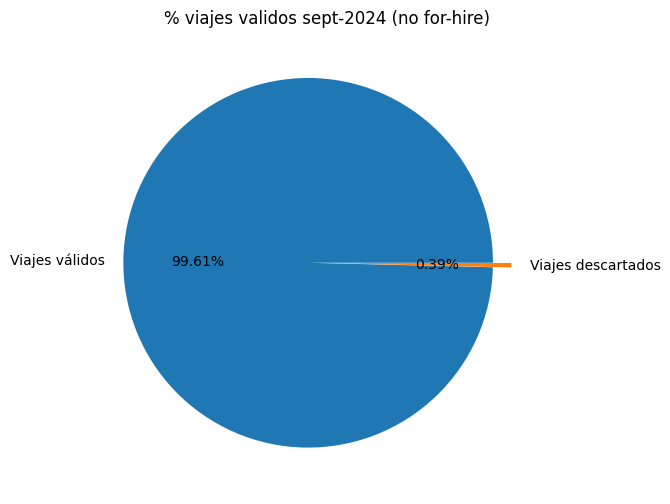

In [20]:
validos = yellow_filtrado.shape[0]+green_filtrado.shape[0]+hv_filtrado.shape[0]
descartados = (yellow_sample.shape[0]+green_sample.shape[0]+hv_sample.shape[0])-validos

data = [validos, descartados]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('% viajes validos sept-2024 (no for-hire)') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

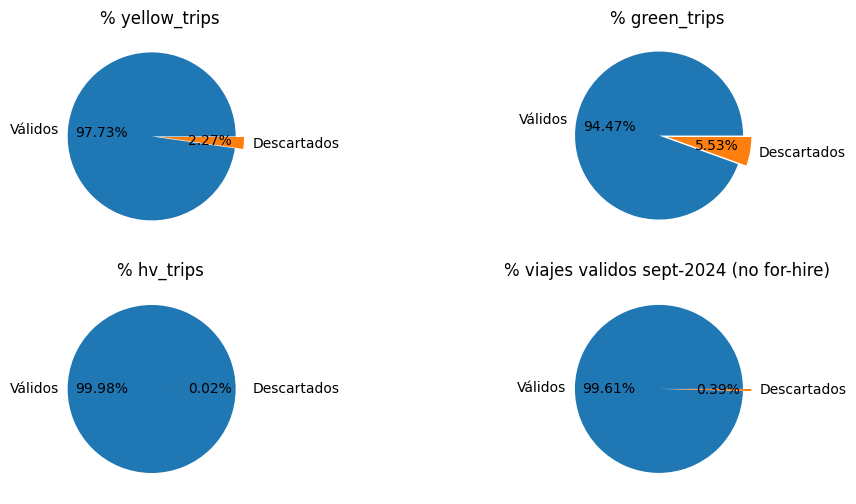

In [21]:
figure, axis = plt.subplots(2,2)


keys = ['Válidos', 'Descartados']


data1 = [yellow_filtrado.shape[0], (yellow_sample.shape[0]-yellow_filtrado.shape[0])]
axis[0, 0].pie(data1, labels=keys,explode=[0.1,0], autopct='%.2f%%')
axis[0, 0].set_title('% yellow_trips')

data2 = [green_filtrado.shape[0], (green_sample.shape[0]-green_filtrado.shape[0])]
axis[0, 1].pie(data2, labels=keys,explode=[0.1,0], autopct='%.2f%%')
axis[0, 1].set_title("% green_trips")


data3 = [hv_filtrado.shape[0], (hv_sample.shape[0]-hv_filtrado.shape[0])]
axis[1, 0].pie(data3, labels=keys,explode=[0.1,0], autopct='%.2f%%')
axis[1, 0].set_title("% hv_trips")

validos = yellow_filtrado.shape[0]+green_filtrado.shape[0]+hv_filtrado.shape[0]
descartados = (yellow_sample.shape[0]+green_sample.shape[0]+hv_sample.shape[0])-validos
data4 = [validos, descartados]
axis[1, 1].pie(data4, labels=keys,explode=[0.1,0], autopct='%.2f%%')
axis[1, 1].set_title("% viajes validos sept-2024 (no for-hire)")

plt.show()